# How to use

This package use PyPlot to visualize figure and ImageMagick to make gif animation. If you haven't installed these packages, you have to do before using this package.

In [2]:
#Pkg.add("PyPlot")
#Pkg.clone("https://github.com/tkMeitner/Percolation.jl")
using Percolation

# Nearest Neighbor

First we make N by N lattice. Then we open each site with probability p and occupied with probability 1-p.

In [5]:
# N: lattice size
# p: occupied probability
N = 10; p = 0.6
square = squarenn(N, p)

Percolation.squarenn(10,0.6,[1 0 … 1 1; 0 0 … 0 1; … ; 1 0 … 0 1; 0 1 … 0 1],[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

To visualize initial condition, type following code.
The white, blue and red sites correspond to open, water and block sites, respectively.
We assume the top of this lattice contacts with water and it permeates the lattice gradually.
If a nearest neighbor site of a water site is open, the open site becomes water site.

We define "percolation" such that at least one path connected between top and bottom exists.
To check whether percolation occurs or not, use percolation function.
percolation function returns a value 0 or 1.
The first value represents if percolation occurs or not. 0 is not percolating and 1 is percolating.

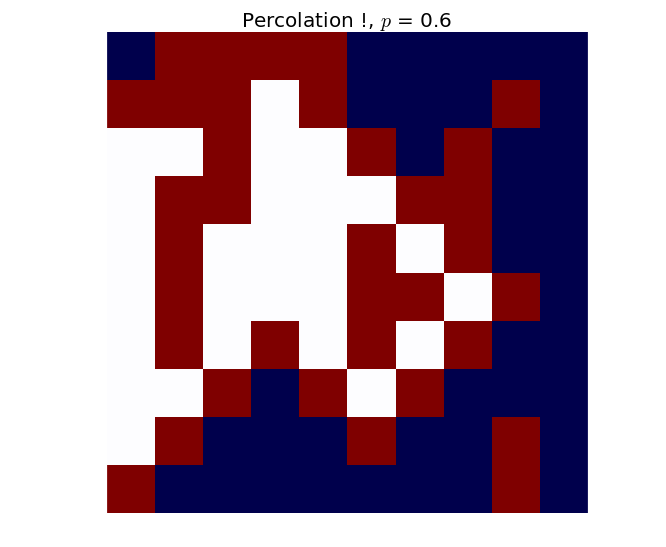

1

In [6]:
percolation(square)
# If you want to use other colormap, see http://matplotlib.org/examples/color/colormaps_reference.html

# Next nearest neighbor

If you want to simulate not only nearest neighbor but next nearest neighbor, use squarennn type.

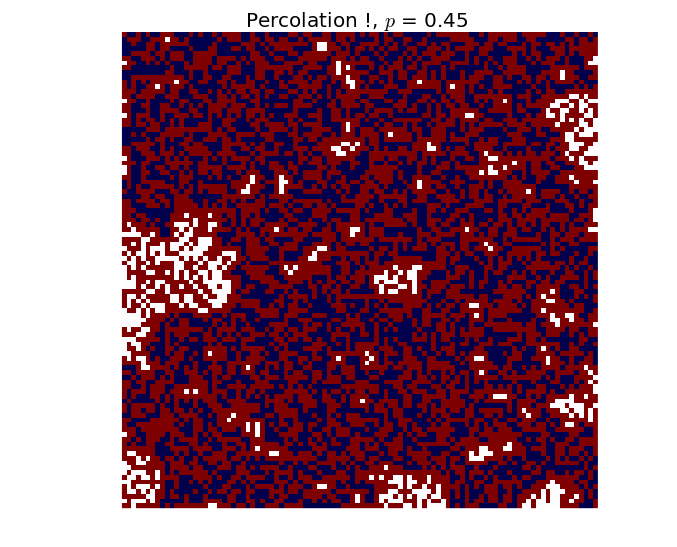

1

In [43]:
N = 100; p = 0.45
size = squarennn(N, p)
percolation(size)

# GIF animation

To make gif animation, use percolationgif function.

In [ ]:
N = 100; p = 0.6;
site = squarenn(N, p) # or squarennn(N, p)
percolationgif(site)

# Triangular lattice

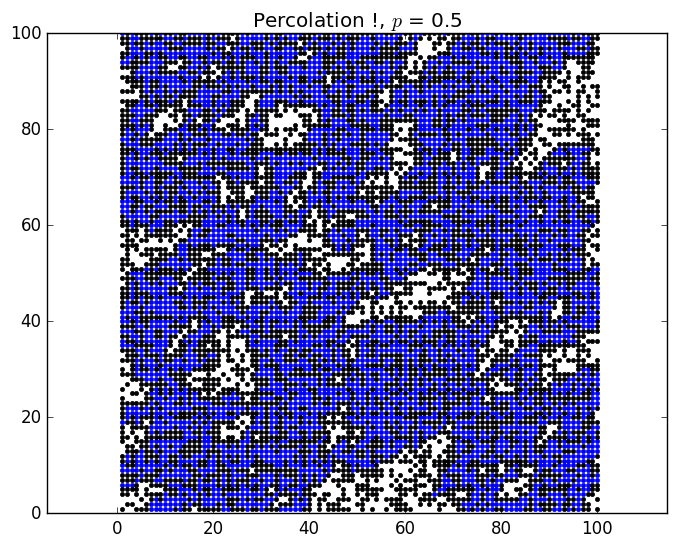

1

In [44]:
N = 100; p = 0.5;
tri = trinn(N, p);
percolation(tri)

# d dimensional simple lattice

In [45]:
N = 100; dim = 3; p = 0.4;
simple = simplenn(N, dim, p);
@time percolation(simple)

 35.974190 seconds (62.20 M allocations: 1.950 GB, 1.40% gc time)


1

# Order Parameter

In [11]:
using PyPlot

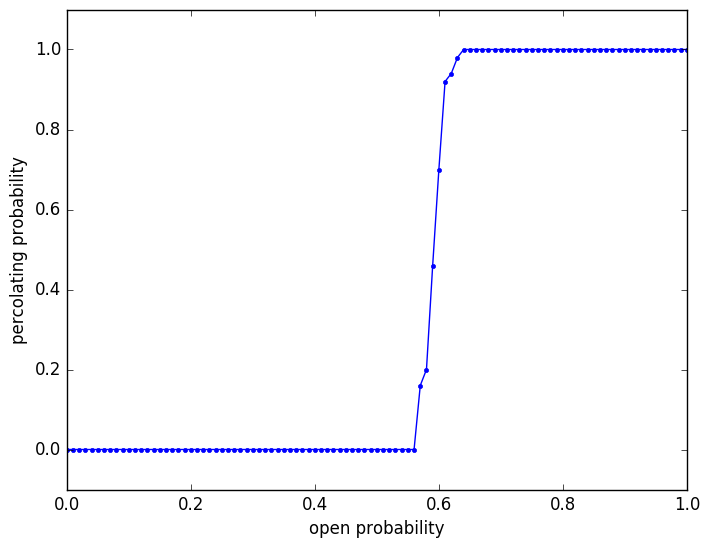

In [12]:
plist = collect(0:0.01:1)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
for i in 1:length(plist)
    for itr in 1:trial
        square = squarenn(N, plist[i])
        hit[i] += percolation(square, fig=false, colorbar=false, water=false)
    end
end
hit /= trial;
plot(plist, hit, ".-");
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

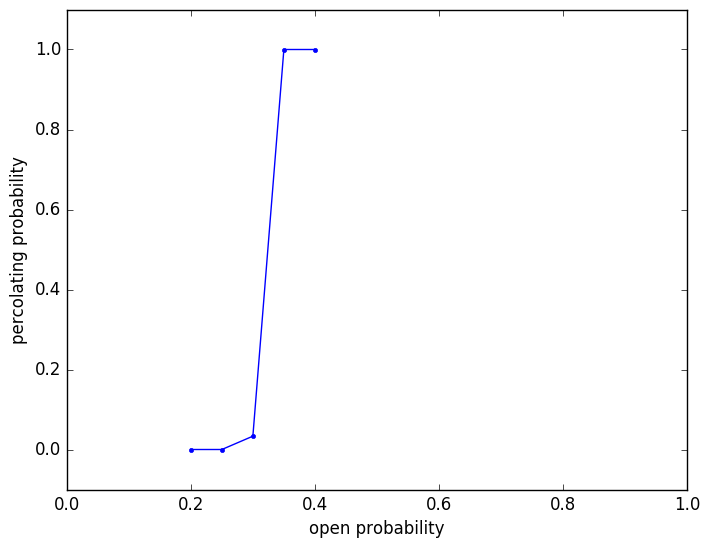

In [47]:
plist = collect(0.2:0.05:0.4)
hit = zeros(Int64, length(plist))
N = 50; trial = 30; dim = 3
for i in 1:length(plist)
    for itr in 1:trial
        square = simplenn(N, dim, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

# Clustering

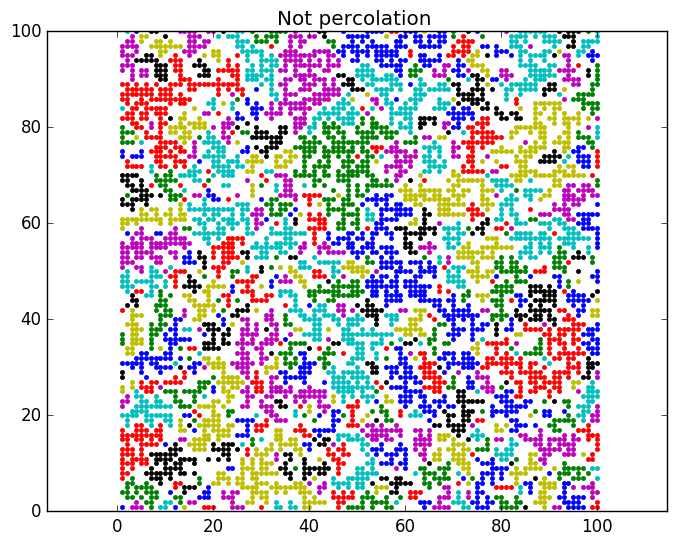

In [4]:
site = squarennrec(100, 0.5); cluster(site); clusterplot(site);